In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('homeprices_banglore.csv')
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [5]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [12]:
def batch_gradient_descent(X,y_true,epochs,learning_rate = 0.01):
    num_features = X.shape[1]
    w = np.ones(shape = num_features)
    b = 0
    total_samples = X.shape[0]
    for i in range(epochs):
        y_predicted = np.dot(w,scaled_X.T)+b
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [14]:
w = []
b = []
cost = []
cost_list = []
epoch_list = []
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

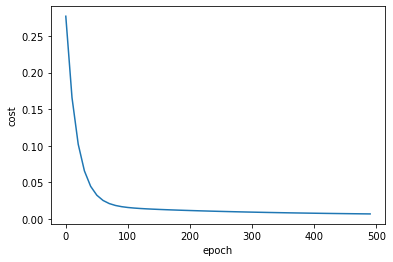

In [15]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [16]:
sx.transform([[2600,4]])
    

array([[0.62068966, 0.75      ]])

In [19]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
    return sy.inverse_transform([[scaled_price]])[0][0]
predict(2600,4,w,b)

128.45484403267596

In [28]:
import random
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w,sample_x.T) + b
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i) 
    return w,b,cost_list,epoch_list

In [29]:
wg = []
bg = []
costs = []
eps = []
wg , bg , costs , eps = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
wg,bg,costs,eps

(array([16.00604489, 10.40468983]),
 -8.646539933946725,
 [0.09986786592452318,
  1.3660658174110685,
  2.225436672264757,
  0.6481655322236123,
  0.5620235187744687,
  0.9364787690942625,
  0.7278424817322012,
  0.1318535262536939,
  0.6300426282342098,
  1.205434074366336,
  1.7880752965534228,
  0.10190010626222734,
  0.10101843049955919,
  4.828498161577779,
  0.4751529704431359,
  3.7062549197509194,
  1.8288629275510917,
  0.8390606831025569,
  3.3993915791198135,
  0.42525464659270185,
  0.3005109949899837,
  2.133519388547761,
  3.3896382682605415,
  3.4636050098959985,
  0.15597240219248493,
  0.1747951991133026,
  9.695647967208012,
  7.922906900076202,
  6.0108150162771405,
  27.35230638457741,
  12.669740839172091,
  4.300260795306295,
  7.011610820598497,
  6.422598577810834,
  3.1541953204037965,
  0.1380468131940083,
  46.97930081722709,
  6.750917681857089,
  9.172521192427974,
  0.6188707440821684,
  13.7308534901233,
  0.3211999595087319,
  0.39221155960733994,
  7.10

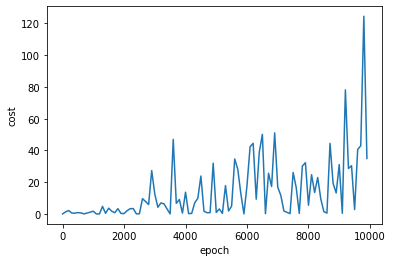

In [30]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(eps,costs)